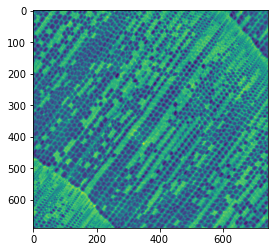

In [85]:
import os
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
im8 = io.imread(r"C:\Zwischenlager\wood_time_slices\8bit_test.tif")
im16 = io.imread(r"C:\Zwischenlager\wood_time_slices\16bit_test.tif")
resultim = io.imread(r"C:\Zwischenlager\wood_time_slices\training_data\ts_5_slice_54_fiber.tif")
plt.imshow(im8)

In [31]:
from ipywidgets import Image
from ipywidgets import ColorPicker, IntSlider, link, AppLayout, HBox
from ipycanvas import RoughCanvas, hold_canvas, Canvas, MultiCanvas

In [86]:
width = im8.shape[1]
height = im8.shape[0]

Mcanvas = MultiCanvas(3, width=width, height=height)
background = Mcanvas[0]
result = Mcanvas[1]
canvas = Mcanvas[2]
canvas.sync_image_data = True

drawing = False
position = None
shape = []


def on_mouse_down(x, y):
    global drawing
    global position
    global shape

    drawing = True
    position = (x, y)
    shape = [position]


def on_mouse_move(x, y):
    global drawing
    global position
    global shape

    if not drawing:
        return

    with hold_canvas():
        canvas.stroke_line(position[0], position[1], x, y)

        position = (x, y)

    shape.append(position)


def on_mouse_up(x, y):
    global drawing
    global position
    global shape

    drawing = False

    with hold_canvas():
        canvas.stroke_line(position[0], position[1], x, y)
        canvas.fill_polygon(shape)

    shape = []

image_data = np.stack((im8, im8, im8), axis=2)
background.put_image_data(image_data, 0, 0)

result.global_alpha = 0.75
# result_data = np.stack((255*(resultim==0), 255*(resultim==1), 255*(resultim==2)), axis=2)
result_data = np.stack((255*(resultim>0), 255*(resultim>10), 255*(resultim>10)), axis=2)
result.put_image_data(result_data, 0, 0)


canvas.on_mouse_down(on_mouse_down)
canvas.on_mouse_move(on_mouse_move)
canvas.on_mouse_up(on_mouse_up)

canvas.stroke_style = "#749cb8"

# canvas.global_alpha = 0.75

picker = ColorPicker(description="Color:", value="#749cb8")

link((picker, "value"), (canvas, "stroke_style"))
link((picker, "value"), (canvas, "fill_style"))

HBox((Mcanvas, picker))

In [63]:
test = canvas.get_image_data()

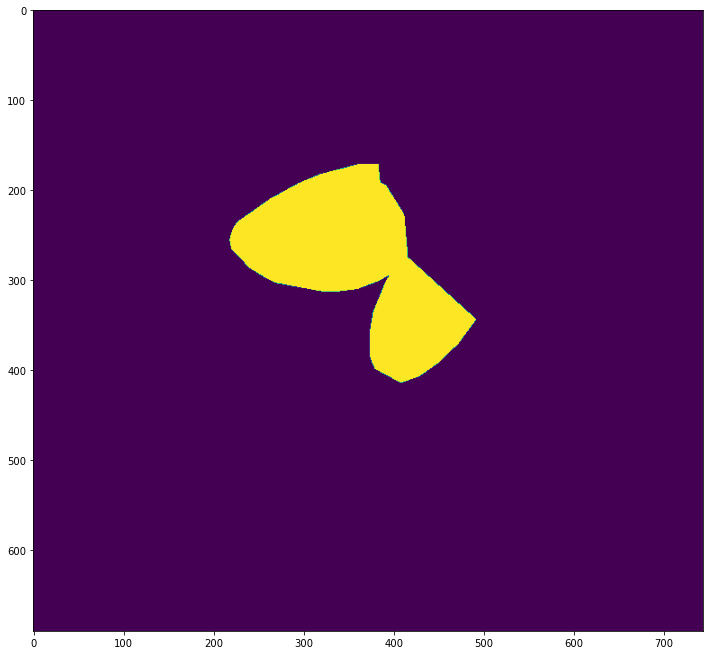

In [64]:
plt.figure(figsize=(12,12))
# plt.imshow(test[200:400,200:400,1])
plt.imshow(test[:,:,0])

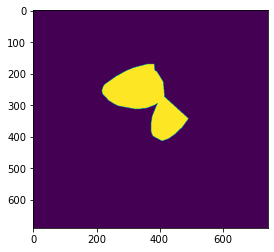

In [90]:
plt.imshow(test[:,:,0]>0)